# Home Credit Default Risk

# <font color='blue'>Project Description</font>

Use alternative data to predict the repayment ability of people with insufficient or non-existent credit histories.

# <font color='blue'>Python Packages</font>

In [1]:
# python packages used throughout the project

import pandas as pd
import numpy as np

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # suppress the warning globally

import matplotlib.pyplot as plt
import seaborn as sns

import os # for reading csv files
import glob # for reading csv files

import re # to search strings for nums

from functools import reduce # to combine final dfs into a single df

from sklearn.preprocessing import LabelEncoder # sklearn preprocessing for dealing with categorical variables

# <font color='blue'>Data Collection</font>

In [2]:
# create a dictionary with file names and their abbreviations

# abbreviations for each data file
data_abb_names = ['a_test', 
                  'a_train', 
                  'b', 
                  'bb', 
                  'ccb', 
                  'hccd', 
                  'ip', 
                  'pcb', 
                  'pa', 
                  'ss']

# file path for csv files
path = r'data/raw'

# list of file names to be read
data_file_names = glob.glob(os.path.join(path, "*.csv")) 

# dictionary of file name and abbreviation
data_file_abb = dict(zip(data_file_names, data_abb_names))

# don't need to import description file
data_file_abb.pop('data/raw\\HomeCredit_columns_description.csv', None)

data_file_abb

{'data/raw\\application_test.csv': 'a_test',
 'data/raw\\application_train.csv': 'a_train',
 'data/raw\\bureau.csv': 'b',
 'data/raw\\bureau_balance.csv': 'bb',
 'data/raw\\credit_card_balance.csv': 'ccb',
 'data/raw\\installments_payments.csv': 'ip',
 'data/raw\\POS_CASH_balance.csv': 'pcb',
 'data/raw\\previous_application.csv': 'pa',
 'data/raw\\sample_submission.csv': 'ss'}

In [3]:
# use a for loop to import data from csv files

for k, v in data_file_abb.items():
    print(k) # print file name and location
    
    df_name = data_file_abb[k] # use the abbreviation to name the df
    
    vars()[df_name] = pd.read_csv(k, # file name
                              header=0, # first row has the column headers
                              index_col=0) # first column has the index values


data/raw\application_test.csv
data/raw\application_train.csv
data/raw\bureau.csv
data/raw\bureau_balance.csv
data/raw\credit_card_balance.csv
data/raw\installments_payments.csv
data/raw\POS_CASH_balance.csv
data/raw\previous_application.csv
data/raw\sample_submission.csv


## <font color='green'>Data Preview</font>

In [4]:
# application_train.csv
print("There training data has %s loan applications, with %s features, plus the target variable." % (a_train.shape[0],a_train.shape[1]-1))
a_train.head()

There training data has 307511 loan applications, with 120 features, plus the target variable.


,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# application_test.csv
print("The testing data has %s loan applications, with %s features, with no target variable." % (a_test.shape[0],a_test.shape[1]))
a_test.head()

The testing data has 48744 loan applications, with 120 features, with no target variable.


,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,Unaccompanied,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# bureau.csv
b.head()

,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
SK_ID_CURR,,,,,,,,,,,,,,,,
215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [7]:
# bureau_balance.csv
bb.head()

,MONTHS_BALANCE,STATUS
SK_ID_BUREAU,,
5715448,0,C
5715448,-1,C
5715448,-2,C
5715448,-3,C
5715448,-4,C


In [8]:
# credit_card_balance.csv
ccb.head()

,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
SK_ID_PREV,,,,,,,,,,,,,,,,,,,,,
2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,1800.0,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,2250.0,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,2250.0,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,11925.0,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,27000.0,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [9]:
# installments_payments.csv
ip.head()

,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
SK_ID_PREV,,,,,,,
1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [10]:
# POS_CASH_balance.csv
pcb.head()

,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
SK_ID_PREV,,,,,,,
1803195,182943,-31,48.0,45.0,Active,0,0
1715348,367990,-33,36.0,35.0,Active,0,0
1784872,397406,-32,12.0,9.0,Active,0,0
1903291,269225,-35,48.0,42.0,Active,0,0
2341044,334279,-35,36.0,35.0,Active,0,0


In [11]:
# previous_application.csv
pa.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
SK_ID_PREV,,,,,,,,,,,,,,,,,,,,,
2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# sample submission
ss.head()

,TARGET
SK_ID_CURR,
100001,0.5
100005,0.5
100013,0.5
100028,0.5
100038,0.5


# <font color='blue'>Data Wrangling</font>

## <font color='green'>Application Train</font>

In [13]:
# explore application_train data
a_train.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In the training data, target column, there are 282686 0s and 24825 1s.


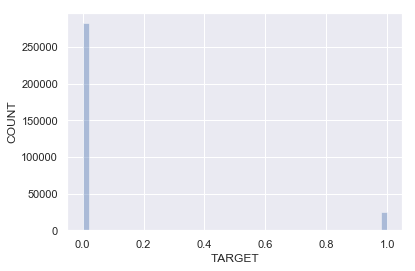

In [14]:
# histogram plot of target values

print('In the training data, target column, there are %s 0s and %s 1s.' \
      % (a_train[a_train.TARGET==0].shape[0], a_train[a_train.TARGET==1].shape[0]))

sns.set()
_ = sns.distplot(a_train['TARGET'], kde=False)
_ = plt.ylabel('COUNT')

Due to the unbalanced nature of the target data (11x as many loans repaid as were loans not repaid), the classes (0,1) will have to be weighted to balance out the amount of each class.

### Missing Data

In [15]:
# function to calculate missing values per column

def miss_val_df(df):
    # Total missing values
    mis_val = df.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)

    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})

    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
    mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)

    # Print some summary information
    print(str(mis_val_table_ren_columns.shape[0]) 
          + ' out of the ' 
          + str(df.shape[1]) 
          + ' total columns have missing values.')

    # Return the dataframe with missing information
    return mis_val_table_ren_columns

In [16]:
miss_val_df(a_train).head(25)

67 out of the 121 total columns have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


In [17]:
# column types
a_train.dtypes.value_counts()

float64    65
int64      40
object     16
dtype: int64

In [18]:
# number of unique values per category column
a_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0).sort_values(ascending=False)

ORGANIZATION_TYPE             58
OCCUPATION_TYPE               18
NAME_INCOME_TYPE               8
WALLSMATERIAL_MODE             7
WEEKDAY_APPR_PROCESS_START     7
NAME_TYPE_SUITE                7
NAME_HOUSING_TYPE              6
NAME_FAMILY_STATUS             6
NAME_EDUCATION_TYPE            5
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
CODE_GENDER                    3
EMERGENCYSTATE_MODE            2
FLAG_OWN_REALTY                2
FLAG_OWN_CAR                   2
NAME_CONTRACT_TYPE             2
dtype: int64

In [19]:
cols = a_train.columns.tolist()
print(len(cols))
a_train = pd.get_dummies(a_train)
a_train.head()

121


,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,...,0,0,0,0,0,0,1,0,1,0
100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,...,0,1,0,0,0,0,0,0,1,0
100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,...,0,0,0,0,0,0,0,0,0,0
100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,...,0,0,0,0,0,0,0,0,0,0
100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,...,0,0,0,0,0,0,0,0,0,0


# <font color='blue'>Data Storytelling</font>

# <font color='blue'>Modeling</font>